In [2]:
import pandas as pd
%matplotlib inline

In [3]:
anaphora = pd.read_csv('data_total.csv', encoding='cp1251')
anaphora = anaphora.drop('Unnamed: 0', 1)
anaphora.head(10)

,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,0.0,p,f,4.0,N,0.663413,0.992907,0.874818,0.801686,1.0,5.0,1.0,1.0,0.0,p,-,они
1,0.0,p,m,10.0,A,0.577254,0.971050,0.736436,0.191687,2.0,15.0,1.0,1.0,0.0,p,-,они
2,1.0,p,m,6.0,N,0.580460,0.944659,0.543260,0.299463,3.0,21.0,1.0,1.0,0.0,p,-,они
3,0.0,p,m,5.0,A,0.627596,0.914894,0.467015,0.253229,4.0,26.0,1.0,1.0,0.0,p,-,они
4,0.0,s,f,4.0,N,0.338136,0.905800,0.571886,0.331605,5.0,31.0,1.0,0.0,0.0,p,-,они
5,0.0,-,-,6.0,S,0.000000,0.904044,0.646364,0.346401,6.0,37.0,1.0,0.0,0.0,p,-,они
6,0.0,s,m,7.0,N,0.689964,0.869259,0.664812,0.357136,7.0,45.0,1.0,0.0,0.0,p,-,они
7,0.0,-,-,3.0,S,0.000000,0.869259,0.664125,0.363211,8.0,48.0,1.0,0.0,0.0,p,-,они
8,0.0,-,-,9.0,V,0.632091,0.828150,0.627526,0.385936,9.0,57.0,1.0,0.0,0.0,p,-,они
9,0.0,-,-,2.0,Q,0.000000,0.828150,0.627526,0.425611,10.0,59.0,1.0,0.0,0.0,p,-,они


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

In [5]:
le_count = LabelEncoder()
le_gend = LabelEncoder()
le_c_pos = LabelEncoder()
le_target = LabelEncoder()
anaphora['c_count'] = le_count.fit_transform(anaphora['c_count'])
anaphora['c_gend'] = le_gend.fit_transform(anaphora['c_gend'])
anaphora['t_count'] = le_count.fit_transform(anaphora['t_count'])
anaphora['t_gend'] = le_gend.fit_transform(anaphora['t_gend'])
anaphora['c_pow'] = le_c_pos.fit_transform(anaphora['c_pow'])
anaphora['target'] = le_target.fit_transform(anaphora['target'])
print(anaphora.columns)
anaphora

Index(['answ', 'c_count', 'c_gend', 'c_len', 'c_pow', 'dif_cand_disc',
       'dif_disc_both', 'dif_minus5', 'dif_plus5', 'dist', 'dist_in_char',
       'is_punct', 'same_count', 'same_gend', 't_count', 't_gend', 'target'],
      dtype='object')


,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,0.0,1,2,4.0,5,0.663413,0.992907,0.874818,0.801686,1.0,5.0,1.0,1.0,0.0,1,0,59
1,0.0,1,3,10.0,1,0.577254,0.971050,0.736436,0.191687,2.0,15.0,1.0,1.0,0.0,1,0,59
2,1.0,1,3,6.0,5,0.580460,0.944659,0.543260,0.299463,3.0,21.0,1.0,1.0,0.0,1,0,59
3,0.0,1,3,5.0,1,0.627596,0.914894,0.467015,0.253229,4.0,26.0,1.0,1.0,0.0,1,0,59
4,0.0,2,2,4.0,5,0.338136,0.905800,0.571886,0.331605,5.0,31.0,1.0,0.0,0.0,1,0,59
5,0.0,0,0,6.0,9,0.000000,0.904044,0.646364,0.346401,6.0,37.0,1.0,0.0,0.0,1,0,59
6,0.0,2,3,7.0,5,0.689964,0.869259,0.664812,0.357136,7.0,45.0,1.0,0.0,0.0,1,0,59
7,0.0,0,0,3.0,9,0.000000,0.869259,0.664125,0.363211,8.0,48.0,1.0,0.0,0.0,1,0,59
8,0.0,0,0,9.0,10,0.632091,0.828150,0.627526,0.385936,9.0,57.0,1.0,0.0,0.0,1,0,59
9,0.0,0,0,2.0,7,0.000000,0.828150,0.627526,0.425611,10.0,59.0,1.0,0.0,0.0,1,0,59


In [6]:
import numpy as np

In [7]:
print(anaphora['dif_cand_disc'].describe())
anaphora['dif_cand_disc'].loc[anaphora['answ']==1].describe()

count    35400.000000
mean         0.202122
std          0.233737
min         -0.513947
25%          0.000000
50%          0.040857
75%          0.416482
max          0.905373
Name: dif_cand_disc, dtype: float64


count    1416.000000
mean        0.370089
std         0.231932
min        -0.126080
25%         0.216156
50%         0.431032
75%         0.545902
max         0.826330
Name: dif_cand_disc, dtype: float64

In [8]:
print(np.mean(anaphora['dif_disc_both'].loc[anaphora['answ']==0]))
np.mean(anaphora['dif_disc_both'].loc[anaphora['answ']==1])

0.6275506799948812


0.8385223604492874

In [9]:
print(np.mean(anaphora['dif_minus5'].loc[anaphora['answ']==0]))
np.mean(anaphora['dif_minus5'].loc[anaphora['answ']==1])

0.22203466124742596


0.41050580094976435

In [10]:
print(np.mean(anaphora['dif_plus5'].loc[anaphora['answ']==0]))
np.mean(anaphora['dif_plus5'].loc[anaphora['answ']==1])

0.21431196525132845


0.4432575493898101

In [11]:
anaphora_vec = anaphora[['dif_cand_disc', 'dif_disc_both', 'dif_minus5', 'dif_plus5', 'answ']]

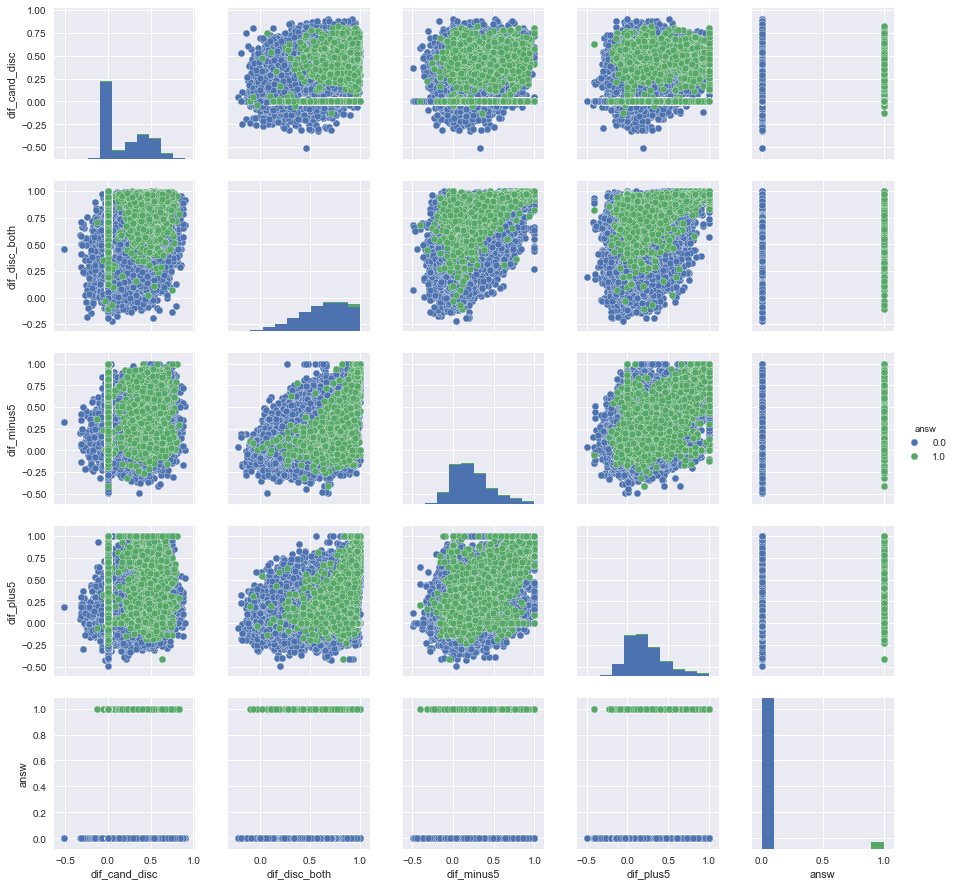

In [12]:
sns.pairplot(anaphora_vec, hue="answ")
sns.plt.show()

In [14]:
anaphora_vec = anaphora_vec.sample(frac=1).reset_index(drop=True)#.drop('index',1)
anaphora_vec.head()

,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,answ
0,0.566873,0.623274,-0.081406,0.042224,0.0
1,0.000000,0.819495,0.335782,0.500231,0.0
2,0.255797,0.712772,0.198454,0.344633,0.0
3,0.285003,0.298385,0.167877,0.388888,0.0
4,0.437852,0.698787,0.248191,0.392116,0.0


In [15]:
for_work = anaphora_vec.loc[:29999,:]
for_evaluation = anaphora_vec.loc[30000:,:]

for_simp = for_work#.loc[:10000,:]
train, test = train_test_split(for_simp, test_size=0.3, random_state=29)
features = ['dif_cand_disc', 'dif_disc_both', 'dif_minus5', 'dif_plus5']

#auc = accuracy_score()

In [18]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[5,10, 20, 50], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf.predict(test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      8634
        1.0       0.32      0.05      0.09       366

avg / total       0.93      0.96      0.94      9000

RandomForestClassifier(bootstrap=True, class_weight={1: 5, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [22]:
def print_importancies(coef, features):
    importances = {}
    for i in range(len(features)):
        importances[coef[i]] = features[i]

    for key in sorted([abs(x) for x in importances.keys()], reverse=True):
        try:
            print(str(key) + '  = importance of '+ importances[key])
        except:
            print(str(-key) + '  = importance of '+ importances[-key])

In [24]:
rf_b = RandomForestClassifier(class_weight={1: 5, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1)
rf_b.fit(train[features], train['answ'])
print(classification_report(test['answ'], rf_b.predict(test[features])))
print_importancies(rf_b.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      8634
        1.0       0.35      0.05      0.09       366

avg / total       0.94      0.96      0.94      9000

0.2977265617  = importance of dif_disc_both
0.269985038357  = importance of dif_plus5
0.235142352233  = importance of dif_minus5
0.197146047709  = importance of dif_cand_disc


In [45]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced'], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[500, 1000]}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf_1.predict(test[features])))
clf_1.best_estimator_

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97      8631
        1.0       0.35      0.29      0.32       369

avg / total       0.94      0.95      0.95      9000



LogisticRegression(C=0.10000000000000001, class_weight={1: 5, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=500, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [26]:
lr_b_w3 = LogisticRegression(C=0.2, class_weight={1: 5, 0: 1},
          max_iter=500, multi_class='ovr', n_jobs=-1, penalty='l2',
          random_state=None, solver='sag')
lr_b_w3.fit(train[features], train['answ'])
print(classification_report(test['answ'], lr_b_w3.predict(test[features])))
print_importancies(lr_b_w3.coef_[0], features)

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97      8634
        1.0       0.37      0.30      0.33       366

avg / total       0.95      0.95      0.95      9000

3.69485253189  = importance of dif_disc_both
2.28790579652  = importance of dif_cand_disc
1.1973071308  = importance of dif_plus5
0.329470132387  = importance of dif_minus5


print(classification_report(for_evaluation['answ'], clf_1.predict(for_evaluation[features])))
accuracy_score(for_evaluation['answ'], clf_1.predict(for_evaluation[features]))

ad = AdaBoostClassifier()
ad.fit(train[features], train['answ'])
print(classification_report(test['answ'], ad.predict(test[features])))

In [19]:
correct = for_work.loc[anaphora_vec['answ']==1]
incorrect = for_work.loc[anaphora_vec['answ']==0]
sample_data = pd.concat([correct, incorrect.sample(2*len(correct))]).sample(frac=1).reset_index(drop=True)
print(len(correct), len(incorrect))
samp_train, samp_test = train_test_split(sample_data, test_size=0.2, random_state=17)
len(sample_data)

1199 28801


3597

In [35]:
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[20, 25, 35, 45, 50], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20],
             'random_state':[0, 10, 20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf.predict(samp_test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.78      0.84      0.81       497
        1.0       0.58      0.48      0.52       231

avg / total       0.71      0.72      0.72       728

RandomForestClassifier(bootstrap=True, class_weight={1: 5, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [25]:
rf_b_bal = RandomForestClassifier(class_weight={1: 5, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            min_samples_leaf=1, min_samples_split=2, n_estimators=45, n_jobs=-1)
rf_b_bal.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], rf_b_bal.predict(samp_test[features])))
print_importancies(rf_b_bal.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82       477
        1.0       0.66      0.55      0.60       243

avg / total       0.74      0.75      0.75       720

0.383647079231  = importance of dif_disc_both
0.226350271208  = importance of dif_plus5
0.222287923529  = importance of dif_minus5
0.167714726031  = importance of dif_cand_disc


In [21]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='sag', n_jobs=-1)#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced'], 'random_state':[0, 10, 20],
              'C':np.arange(0.01, 0.12, 0.01), 'max_iter':[1000,1500]}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf_1.predict(samp_test[features])))
#print(cross_val_score(clf, samp_train[features], samp_train['answ']).mean())
clf_1.best_estimator_

             precision    recall  f1-score   support

        0.0       0.84      0.71      0.77       477
        1.0       0.56      0.72      0.63       243

avg / total       0.74      0.72      0.72       720



LogisticRegression(C=0.029999999999999999, class_weight='balanced',
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=1000, multi_class='ovr', n_jobs=-1, penalty='l2',
          random_state=0, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [27]:
lr_b_bal = LogisticRegression(C=0.3, class_weight='balanced', max_iter=1000,
          n_jobs=-1, penalty='l2', random_state=None, solver='sag')
lr_b_bal.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], lr_b_bal.predict(samp_test[features])))
print_importancies(rf_b_bal.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.86      0.70      0.77       477
        1.0       0.57      0.77      0.66       243

avg / total       0.76      0.73      0.73       720

0.383647079231  = importance of dif_disc_both
0.226350271208  = importance of dif_plus5
0.222287923529  = importance of dif_minus5
0.167714726031  = importance of dif_cand_disc


In [41]:
sec_lvl_model_train = pd.DataFrame({'rf_1':rf_b_bal.predict(samp_train[features]), 'lr_1':lr_b_bal.predict(samp_train[features]),
                             'rf_2':rf_b.predict(samp_train[features]), 'lr_2':lr_b_w3.predict(samp_train[features]),
                             'answ':samp_train['answ']})

sec_lvl_model_eval = pd.DataFrame({'rf_1':rf_b_bal.predict(for_evaluation[features]), 'lr_1':lr_b_bal.predict(for_evaluation[features]),
                             'rf_2':rf_b.predict(for_evaluation[features]), 'lr_2':lr_b_w3.predict(for_evaluation[features]),
                             'answ':for_evaluation['answ']})

In [44]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[1500, 2000], 'random_state':np.arange(0, 50,10)}
clf_2 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_2.fit(sec_lvl_model_train[['rf_1', 'lr_1']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[['rf_1', 'lr_1']])))
clf_2.best_estimator_ 

             precision    recall  f1-score   support

        0.0       0.98      0.87      0.92      5183
        1.0       0.14      0.52      0.23       217

avg / total       0.94      0.86      0.89      5400



LogisticRegression(C=0.10000000000000001, class_weight={1: 5, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=1500, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=0, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [50]:
lr_2_lvl = LogisticRegression(C=0.1, class_weight={1: 5, 0: 1}, max_iter=1000,
          n_jobs=-1, penalty='l2', random_state=0, solver='sag')
lr_2_lvl.fit(sec_lvl_model_train[['rf_1', 'lr_1']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[['rf_1', 'lr_1']])))
#print_importancies(rf_b_bal.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.98      0.87      0.92      5183
        1.0       0.14      0.52      0.23       217

avg / total       0.94      0.86      0.89      5400



In [53]:
accuracy_score(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[['rf_1', 'lr_1']]))

0.85703703703703704

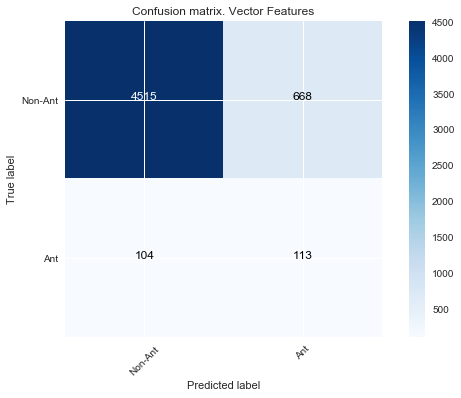

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
#import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

mat = confusion_matrix(sec_lvl_model_eval['answ'], lr_2_lvl.predict(sec_lvl_model_eval[['rf_1', 'lr_1']]))
plt.figure()
plot_confusion_matrix(mat, classes=['Non-Ant', 'Ant'],
                      title='Confusion matrix. Vector Features')
plt.show()

In [ ]:
print(classification_report(for_evaluation['answ'], clf_1.predict(for_evaluation[features])))
accuracy_score(for_evaluation['answ'], clf_1.predict(for_evaluation[features]))

In [36]:
print(classification_report(for_evaluation['answ'], clf.predict(for_evaluation[features])))
accuracy_score(for_evaluation['answ'], clf.predict(for_evaluation[features]))

             precision    recall  f1-score   support

        0.0       0.98      0.88      0.93      5197
        1.0       0.13      0.47      0.21       203

avg / total       0.95      0.86      0.90      5400



0.86388888888888893

In [52]:
svc = SVC()

param_grid = {'C':np.arange(0.1, 1.0, 0.1), 'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}],
              'kernel':['rbf', 'sigmoid', 'linear', 'poly'], 'max_iter':[-1,50,100]}


clf = GridSearchCV(svc, param_grid, n_jobs=-1)
#print(len(train[features]), len(train['answ']))
clf.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf.predict(test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      8631
        1.0       0.00      0.00      0.00       369

avg / total       0.92      0.96      0.94      9000

SVC(C=0.10000000000000001, cache_size=200, class_weight={1: 5, 0: 1},
  coef0=0.0, decision_function_shape=None, degree=3, gamma='auto',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


C:\Users\Ksenia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
b_svc = SVC(C=0.1, class_weight={1: 20, 0: 1}, 
  kernel='sigmoid', max_iter=-1, probability=False)
b_svc.fit(train[features], train['answ'])
print(classification_report(test['answ'], b_svc.predict(test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.98      0.68      0.81      8631
        1.0       0.08      0.68      0.15       369

avg / total       0.94      0.68      0.78      9000

SVC(C=0.10000000000000001, cache_size=200, class_weight={1: 5, 0: 1},
  coef0=0.0, decision_function_shape=None, degree=3, gamma='auto',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [58]:
print(classification_report(for_evaluation['answ'], b_svc.predict(for_evaluation[features])))
accuracy_score(for_evaluation['answ'], b_svc.predict(for_evaluation[features]))

             precision    recall  f1-score   support

        0.0       0.98      0.69      0.81      5197
        1.0       0.08      0.66      0.14       203

avg / total       0.95      0.69      0.79      5400



0.6912962962962963